In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [ ]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [43]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [44]:
X = voice_data.drop('label', axis=1)
y = voice_data['label']

In [45]:
is_null_sum = voice_data.isnull().sum().sum()
print(f"Number of nulls - {is_null_sum}")

Number of nulls - 0


In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


In [47]:
dtc_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]'),
 Text(0.25, 0.25, 'entropy = 0.313\nsamples = 1296\nvalue = [73, 1223]'),
 Text(0.75, 0.25, 'entropy = 0.221\nsamples = 1238\nvalue = [1194, 44]')]

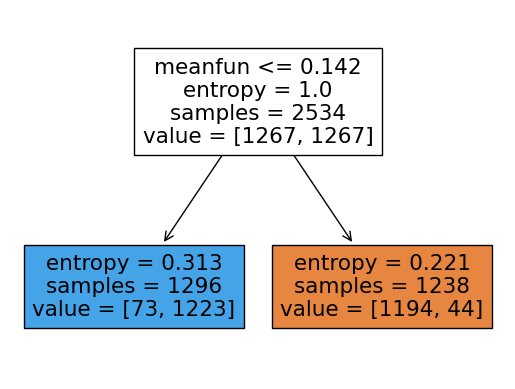

In [48]:
tree.plot_tree(
    decision_tree=dtc_model,
    feature_names=X.columns,
    filled=True,
    impurity=True
)

In [49]:
percents = X_train[X_train['meanfun'] <= 0.142].shape[0] / X_train.shape[0] * 100
print(f"{percents:.2f}")

51.10


In [50]:
pred = dtc_model.predict(X_test)
accuracy_score_value = metrics.accuracy_score(y_test, pred)
print(f"Accuracy score value - {accuracy_score_value:.3f}")

Accuracy score value - 0.956


In [51]:
dtc_model_v2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtc_model_v2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'meanfun <= 0.142\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]\nclass = female'),
 Text(0.25, 0.5, 'IQR <= 0.074\nentropy = 0.313\nsamples = 1296\nvalue = [73, 1223]\nclass = male'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.972\nsamples = 82\nvalue = [49, 33]\nclass = female'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.14\nsamples = 1214\nvalue = [24, 1190]\nclass = male'),
 Text(0.75, 0.5, 'Q25 <= 0.157\nentropy = 0.221\nsamples = 1238\nvalue = [1194, 44]\nclass = female'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.575\nsamples = 293\nvalue = [253, 40]\nclass = female'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.039\nsamples = 945\nvalue = [941, 4]\nclass = female')]

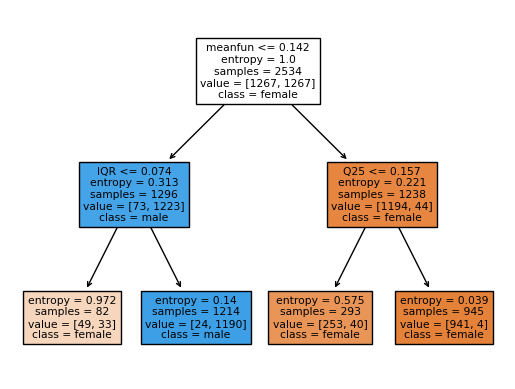

In [52]:
tree.plot_tree(
    decision_tree=dtc_model_v2,
    feature_names=X.columns,
    filled=True,
    impurity=True,
    class_names=dtc_model_v2.classes_
)

In [53]:
pred = dtc_model_v2.predict(X_test)
accuracy_score_value = metrics.accuracy_score(y_test, pred)
print(f"accuracy score value - {accuracy_score_value:.3f}")

accuracy score value - 0.962


In [54]:
dtc_model_v3 = tree.ExtraTreeClassifier(criterion='entropy', random_state=0)
dtc_model_v3.fit(X_train, y_train)

ExtraTreeClassifier(criterion='entropy', random_state=0)

[Text(0.3292641129032258, 0.975, 'sp.ent <= 0.817\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]\nclass = female'),
 Text(0.015483870967741935, 0.925, 'meanfun <= 0.147\nentropy = 0.239\nsamples = 127\nvalue = [122, 5]\nclass = female'),
 Text(0.01032258064516129, 0.875, 'sd <= 0.081\nentropy = 0.863\nsamples = 7\nvalue = [2, 5]\nclass = male'),
 Text(0.005161290322580645, 0.825, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = female'),
 Text(0.015483870967741935, 0.825, 'Q75 <= 0.209\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]\nclass = male'),
 Text(0.01032258064516129, 0.775, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = male'),
 Text(0.02064516129032258, 0.775, 'Q75 <= 0.217\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = female'),
 Text(0.015483870967741935, 0.725, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = female'),
 Text(0.025806451612903226, 0.725, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = male'),
 Text(0.02064516129032258, 0.875, 'en

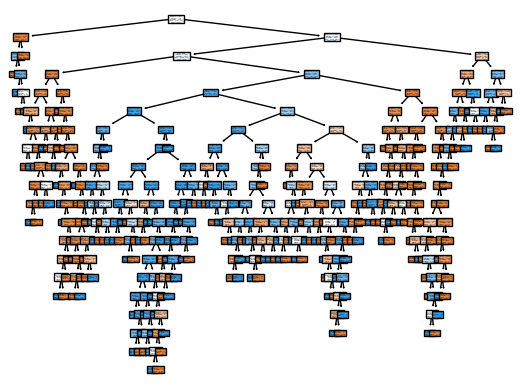

In [55]:
tree.plot_tree(
    decision_tree=dtc_model_v3,
    feature_names=X.columns,
    filled=True,
    impurity=True,
    class_names=dtc_model_v3.classes_
)

In [56]:
depth = dtc_model_v3.get_depth()
n_leaves = dtc_model_v3.get_n_leaves()

print(f"Depth value - {depth}")
print(f"n_leaves value - {n_leaves}")

Depth value - 19
n_leaves value - 207


In [57]:
predicted_train = dtc_model_v3.predict(X_train)
predicted_test = dtc_model_v3.predict(X_test)

In [58]:
accuracy_score_train = metrics.accuracy_score(y_train, predicted_train)
accuracy_score_test = metrics.accuracy_score(y_test, predicted_test)

print(f"Accuracy score for train - {accuracy_score_train:.3f}")
print(f"Accuracy score for test - {accuracy_score_train:.3f}")

Accuracy score for train - 1.000
Accuracy score for test - 1.000


In [59]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [3, 4, 5, 10]
}

dtc_model_v4 = tree.DecisionTreeClassifier()
cv = model_selection.StratifiedKFold(n_splits=5)

grid_search = model_selection.GridSearchCV(
    dtc_model_v4, param_grid=param_grid, cv=cv,
    scoring="accuracy",
    return_train_score=True
)

In [60]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [61]:
print(f"Best params for dtc_model_v4 - {grid_search.best_params_}")

Best params for dtc_model_v4 - {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3}


In [62]:
best_tree = tree.DecisionTreeClassifier(**grid_search.best_params_)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=3)

In [63]:
train_pr = best_tree.predict(X_train)
test_pr = best_tree.predict(X_test)

accuracy_score_train = metrics.accuracy_score(y_train, train_pr)
accuracy_score_test = metrics.accuracy_score(y_test, test_pr)

print(f"Accuracy score for train - {accuracy_score_train:.3f}")
print(f"Accuracy score for test - {accuracy_score_train:.3f}")

Accuracy score for train - 0.999
Accuracy score for test - 0.999
